# TP Majeures Science des données

### Gérér l'affichage des courbes

On va utiliser pyplot du module matplotlib pour afficher les courbes et les graphiques

La commande *%matplotlib inline* fait en sorte que les courbes apparaissent dans le notebook.

Si vous voulez sauvegarder les courbes sans les afficher, il faut ajouter la commande *matplotlib.use('Agg')* entre les 2 commandes suivantes :


In [1]:
# utiliser matplotlib
%matplotlib inline
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

## Machines à Vecteurs de Support (SVM)

Si anaconda3 n'est pas installé, il nous faut d'abord installer les modules nécessaires. 


In [2]:
"""
!pip3 -q install sklearn
!pip3 -q install matplotlib
!pip3 -q install seaborn
"""

'\n!pip3 -q install sklearn\n!pip3 -q install matplotlib\n!pip3 -q install seaborn\n'

## Première partie : prise en main des SVM
Cette partie est librement inspirée du travail de Jake VenderPlas, auteur du livre [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do). Son [GitHub](https://github.com/jakevdp/PythonDataScienceHandbook) (en anglais) regorge de fichiers utiles.

Dans un premier temps, on va générer des données jouets, linéairement séparables :

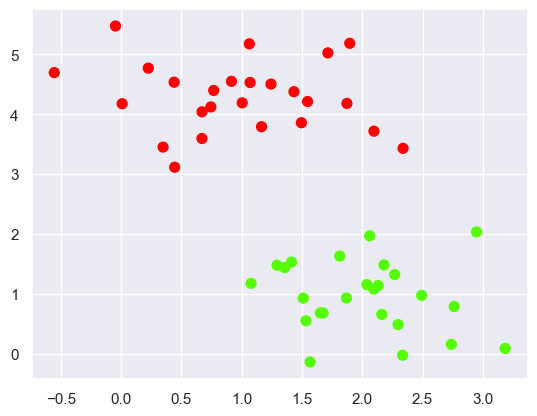

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

#Un petit environment qui donne de meilleurs graphes
import seaborn as sns; sns.set()

# fonction sklearn pour générer des données simples
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# Affichage des données
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism');

### SVM linéaire (Séparateur à vaste marge)
On va commencer par apprendre un SVM linéaire (sans noyau) à l'aide de scikit-learn :

In [4]:
#import de la classe - qui s'appelle SVC et pas SVM...
from sklearn.svm import SVC
#Définition du modèle
model = SVC(kernel='linear', C=1E10)
#Apprentissage sur les donnée
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

On va utiliser une fonction d'affichage qui va bien, où tout ce qui est nécessaire est affiché.

In [5]:
import numpy as np

def affiche_fonction_de_decision(model, ax=None, plot_support=True):
    """Affiche le séparateur, les marges, et les vecteurs de support d'un SVM en 2D"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # création de la grille pour l'évaluation
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # affichage de l'hyperplan et des marges
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Affichage des vecteurs de support
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolor='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Voyons ce que cela donne sur notre séparateur linéaire à vaste marge :

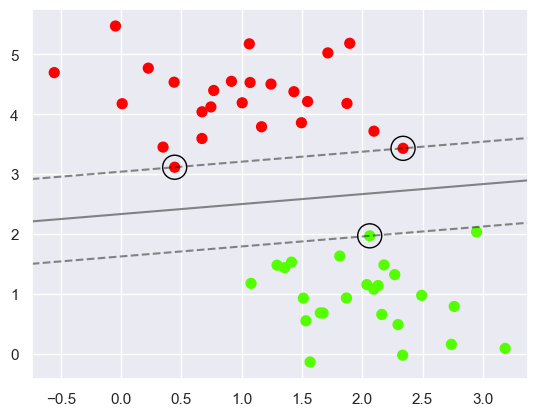

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism')
affiche_fonction_de_decision(model);

Sur ce graphe, on voit le séparateur (ligne pleine), les vecteurs de support (points entourés) et la marge (matérialisée par des lignes discontinues). On a ici le séparateur qui maximise la marge. Scikit-learn nous permet, après apprentissage, de récupérer les vecteurs de supports:

In [7]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Seules trois données sont utiles pour classer de nouvelles données. On peut s'en assurer en rajoutant des données sans changer le modèle :

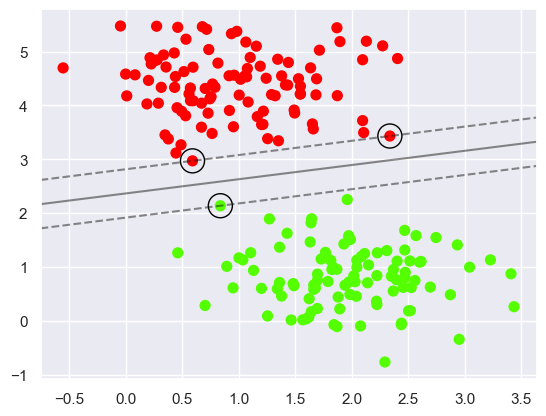

In [8]:
X2, y2 = make_blobs(n_samples=200, centers=2,
                  random_state=0, cluster_std=0.60)

model2 = SVC(kernel='linear', C=1E10)
model2.fit(X2, y2)

plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='prism')
affiche_fonction_de_decision(model2);

## SVM non linéaire
Comme vu en cours, la puissance des séparateurs linéaires est limitée (à des données linéairement séparables). Mais il est possible de contourner cette limitation par l'utilisation de noyaux.

On va commencer par générer des données non-linéairement séparables, puis on apprend un classifieur SVM linéaire et on affiche le résultat :

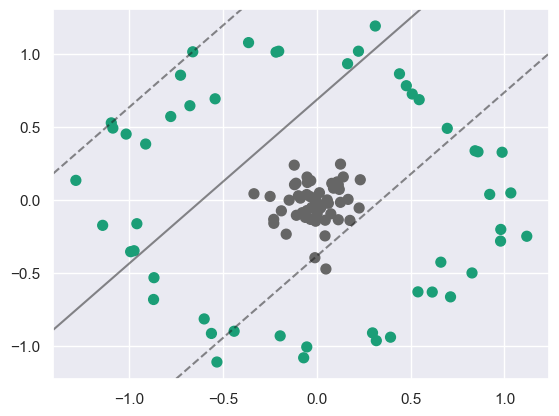

In [9]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2')
affiche_fonction_de_decision(clf, plot_support=False)

Clairement notre apprentissage de séparateur linéaire a échoué...

On va manuellement ajouter une troisième dimension *z* :

In [10]:
z = np.exp(-(X ** 2).sum(1))

On peut afficher les données augmentées et se rendre compte qu'elles sont linéairement séparables dans ce nouvel espace de dimension plus grande :

Text(0.5, 0, 'z')

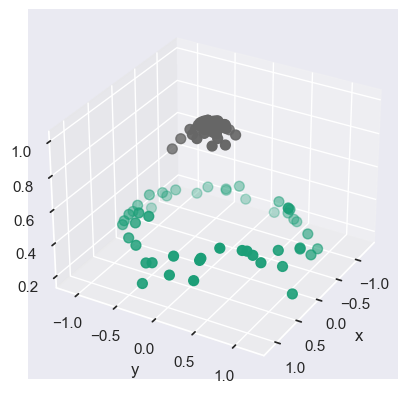

In [11]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], z, c=y, s=50, cmap='Dark2')
ax.view_init(elev=30, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Le plan définit par z=0.7 (par exemple) sépare les 2 classes parfaitement.

Bien entendu, la projection en plus grande dimension est capitale, et en choisissant un autre calcul pour *z* on aurait probablement obtenu des données non linéairement séparables.

Et s'il fallait faire effectivement la projection, cela limiterait drastiquement la dimension de l'espace de plongement ainsi que le nombre de données traitables. C'est pourquoi l'utilisation de noyaux (kernels en anglais) est d'une grande efficacité.

En Scikit-Learn, il suffit de modifier le paramètre *kernel* : jusqu'à présent, nous avons utilisé 'linear' comme valeur. On peut par exemple utiliser *rbf* pour 'radial basis function', le noyau gaussien (celui qui transforme notre espace de description initial vers le 3D avec $z$ précédent), et il nous reste à trouver la bonne valeur du paramètre :

In [12]:
clf = SVC(kernel='rbf', C=1E10)
clf.fit(X, y)

SVC(C=10000000000.0)

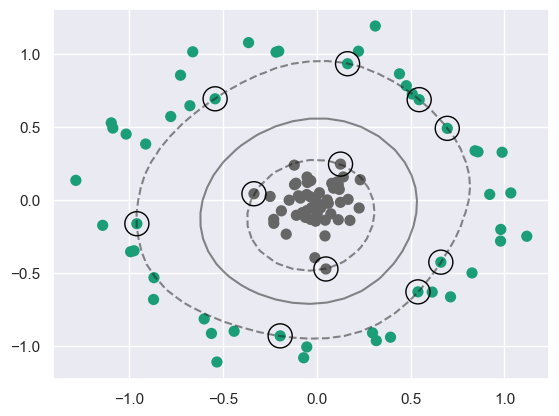

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2')
affiche_fonction_de_decision(clf) 

**Exercice** : exécuter les instructions permettant un apprentissage avec un autre noyau -- pour un plongement dans un autre espace (par exemple noyau polynomial de degré 5), et la visualisation du séparateur. Vous devriez constater que ce n'est pas un noyaux très adapté !

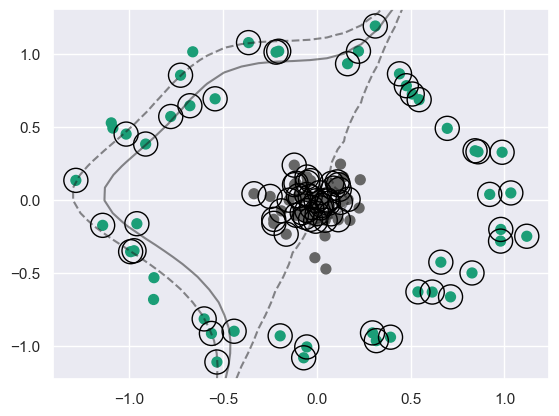

In [14]:
# a vous
clf = SVC(kernel='poly', degree=5)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2')
affiche_fonction_de_decision(clf) 

On voit ici que le séparateur (et la marge associée) ne sont pas linéaire dans l'espace des données, mais qu'ils peuvent s'y représenter sans difficulté.

Notons aussi que le nombre de vecteurs de support reste très petit.

### SVM à marge douce

Il est aussi possible que le problème soit linéairement séparable (dans la dimension initiale des données ou dans un plongement) mais que le bruit (=la mauvaise qualité des données) empêche l'apprenant de trouver un séparateur.

On utilise alors ce que l'on appelle un classifieur à marge douce : on autorise certains points à être dans la marge, voire du mauvais côté de l'hyperplan. C'est le role du paramètre *C* : pour des grosses valeurs, on est quasiment en marge dure, mais plus *C* prend des petites valeurs, plus les marges deviennent permissibles.

On va prendre des données qui se chevauchent un peu : (à ce stade, il est important de comprendre la spécificité des données que l'on génére ci-après: en cas de doute appelez votre enseignant)

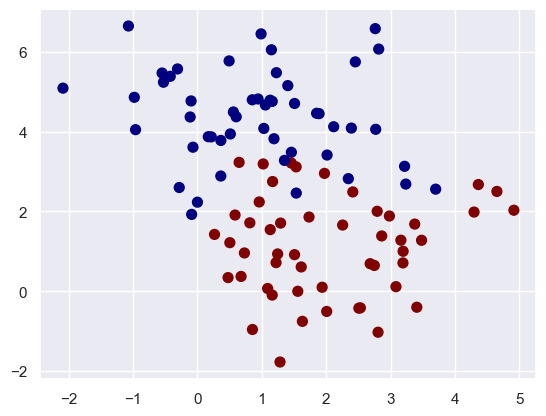

In [15]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet');

On joue alors avec la valeur de *C*

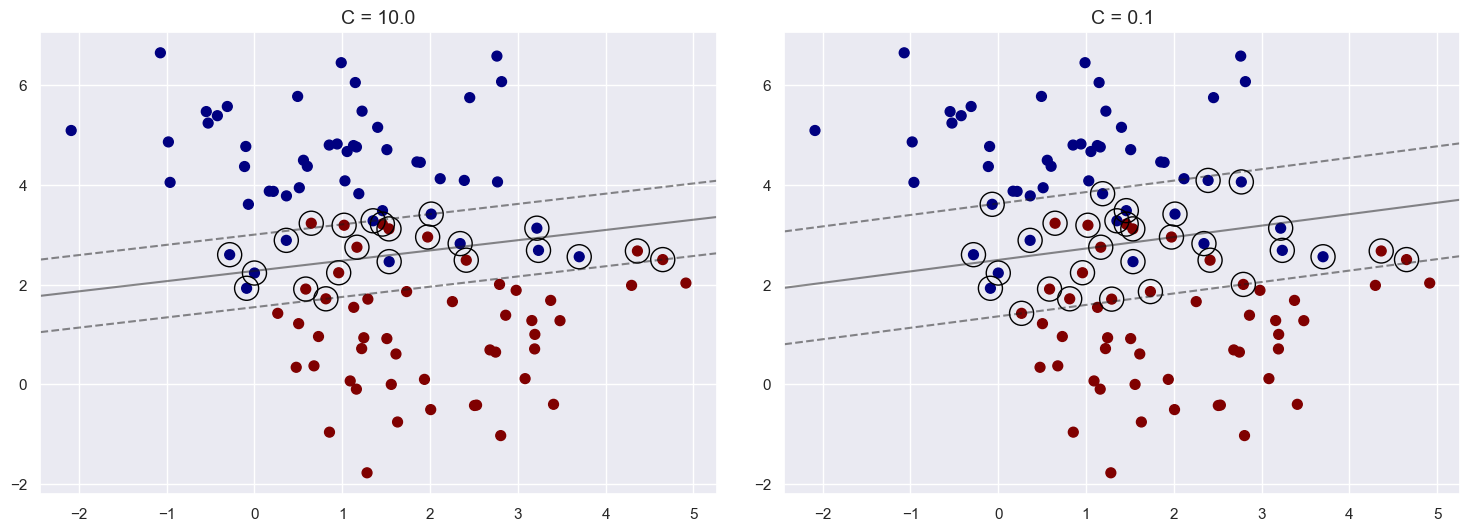

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    affiche_fonction_de_decision(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

## Paramétrer (tuner) un SVM
Tous les noyaux sont paramétrés : il est question ici d'étudier l'impact d'un (hyper)paramètre sur la qualité de l'apprentissage.
Pour cela, on va générer des données qui ne sont pas linéairement séparables :

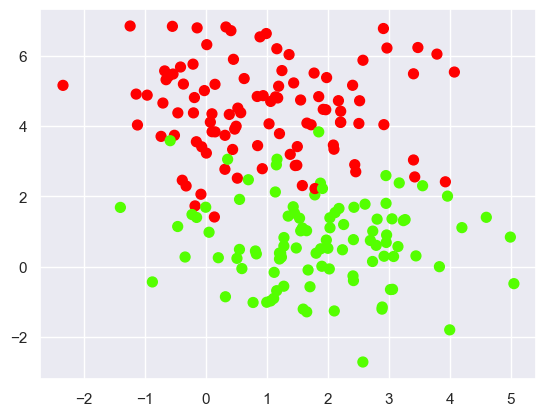

In [17]:
X, y = make_blobs(n_samples=200, centers=2,
                  random_state=0, cluster_std=1.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism')

On va étudier 2 noyaux différents
- le noyau polynomial (*kernel='poly'*) qui a 2 paramètres, *degree* qu'il faut faire varier entre 2 et 6 (au minimum), et *C* (lié à la 'douceur' de la marge)
- le noyau gaussien (*kernel='rbf'*) qui a aussi 2 paramètres, *gamma*, qu'il faut faire varier de 1 à 0.01, et *C* 

A chaque fois, en plus de l'affichage des séparateurs, et de l'estimation de l'erreur, il serait intéressant de regarder combien de vecteurs de support le classifieur appris a besoin.

Nombre de vecteurs de support (sur 200 données) : 26


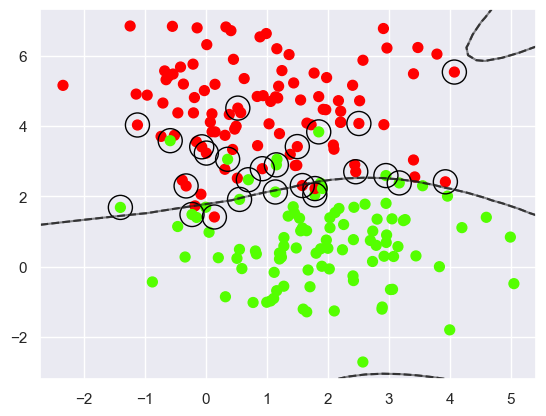

In [18]:
#Exemple avec le noyau gaussien et des valeurs pour gamma et C
clf = SVC(kernel='rbf', gamma=0.01, C=1E10)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism')
affiche_fonction_de_decision(clf) 
print("Nombre de vecteurs de support (sur 200 données) :", len(clf.support_vectors_))

A vous de jouer ! (pour chaque noyau, faire varier les hyper-paramètres dans les intervalles mentionnés, et pour chaque couple d'hyper-paramètres : afficher la frontière de décison, le nombre de vecteurs supports du modèle (le plus petit est le mieux), et le score estimé sur un échantillon test de taille 100 généré de la même façon que l'échantillon d'apprentissage.

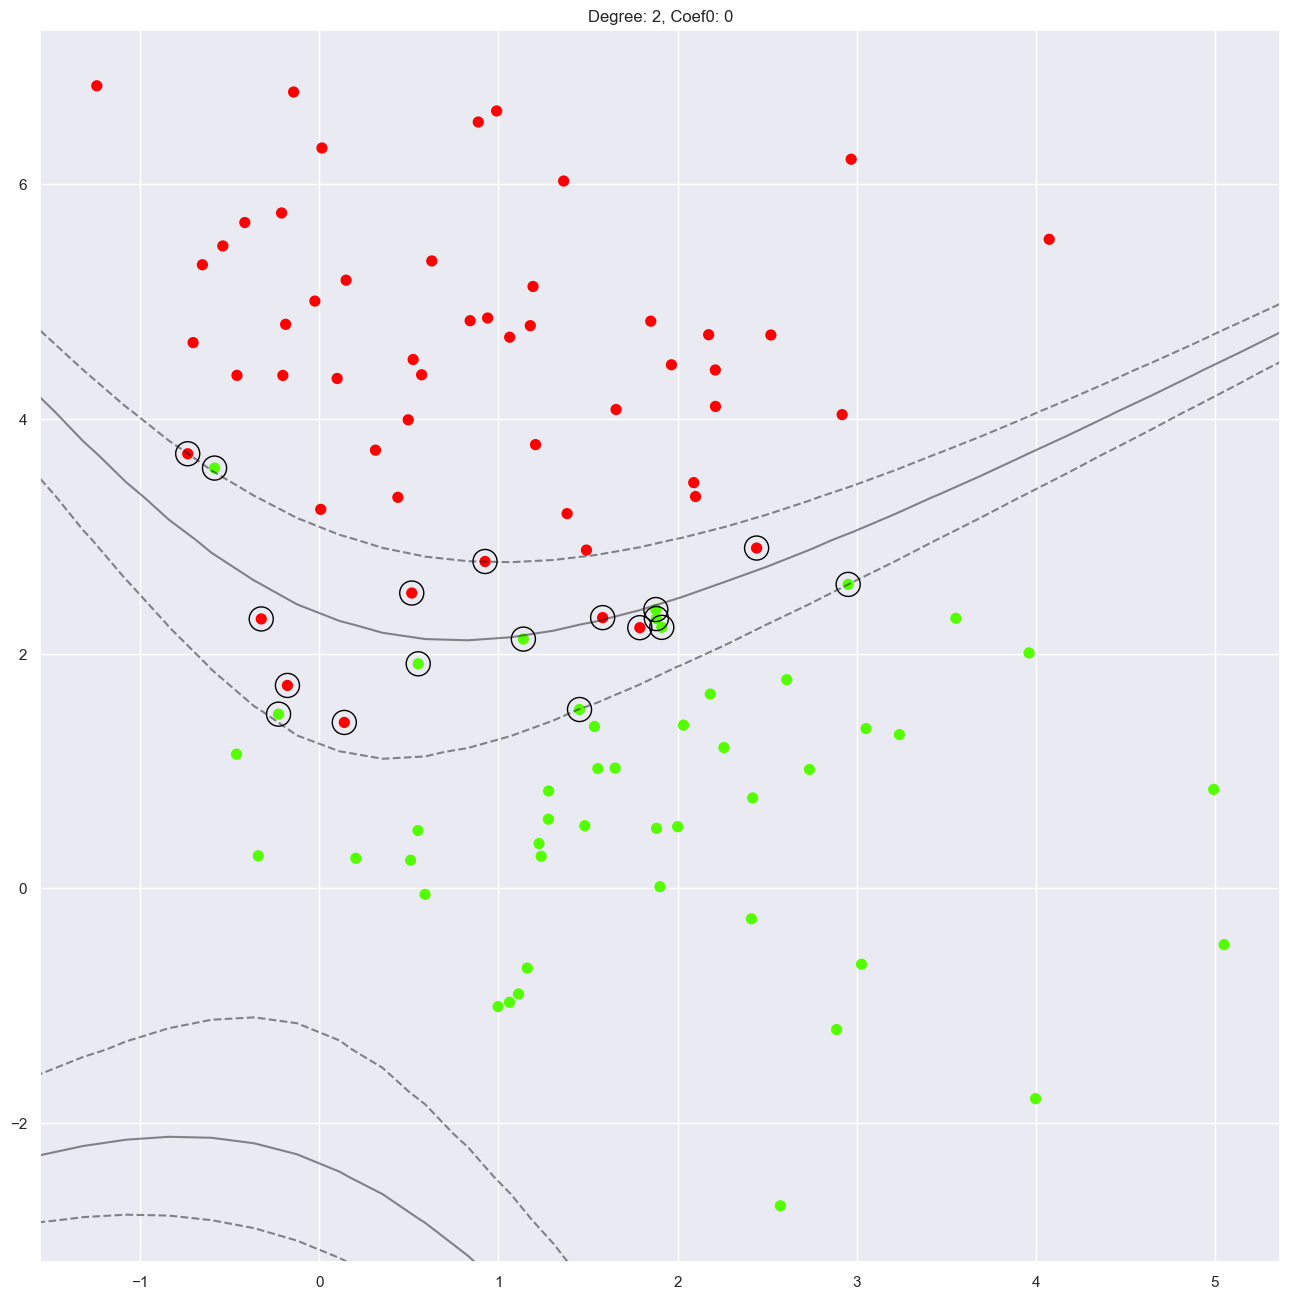

Degree: 2, Coef0: 0
Nombre de vecteurs de support : 18
Score sur échantillon test : 0.88


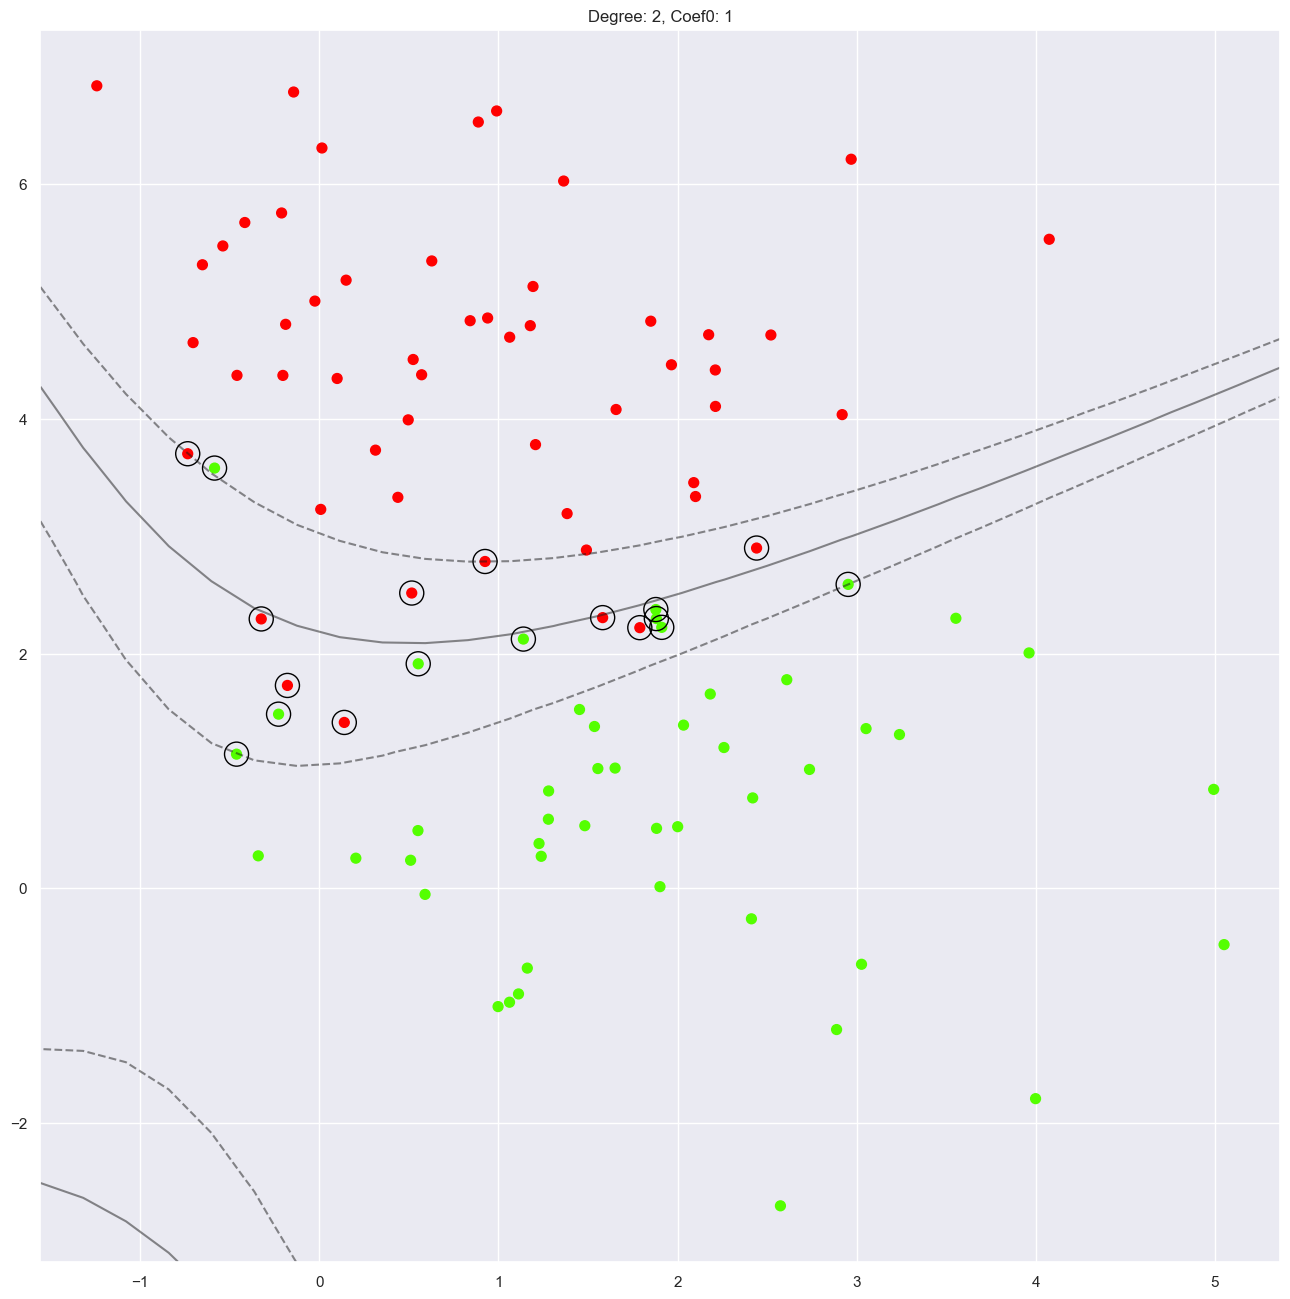

Degree: 2, Coef0: 1
Nombre de vecteurs de support : 18
Score sur échantillon test : 0.89


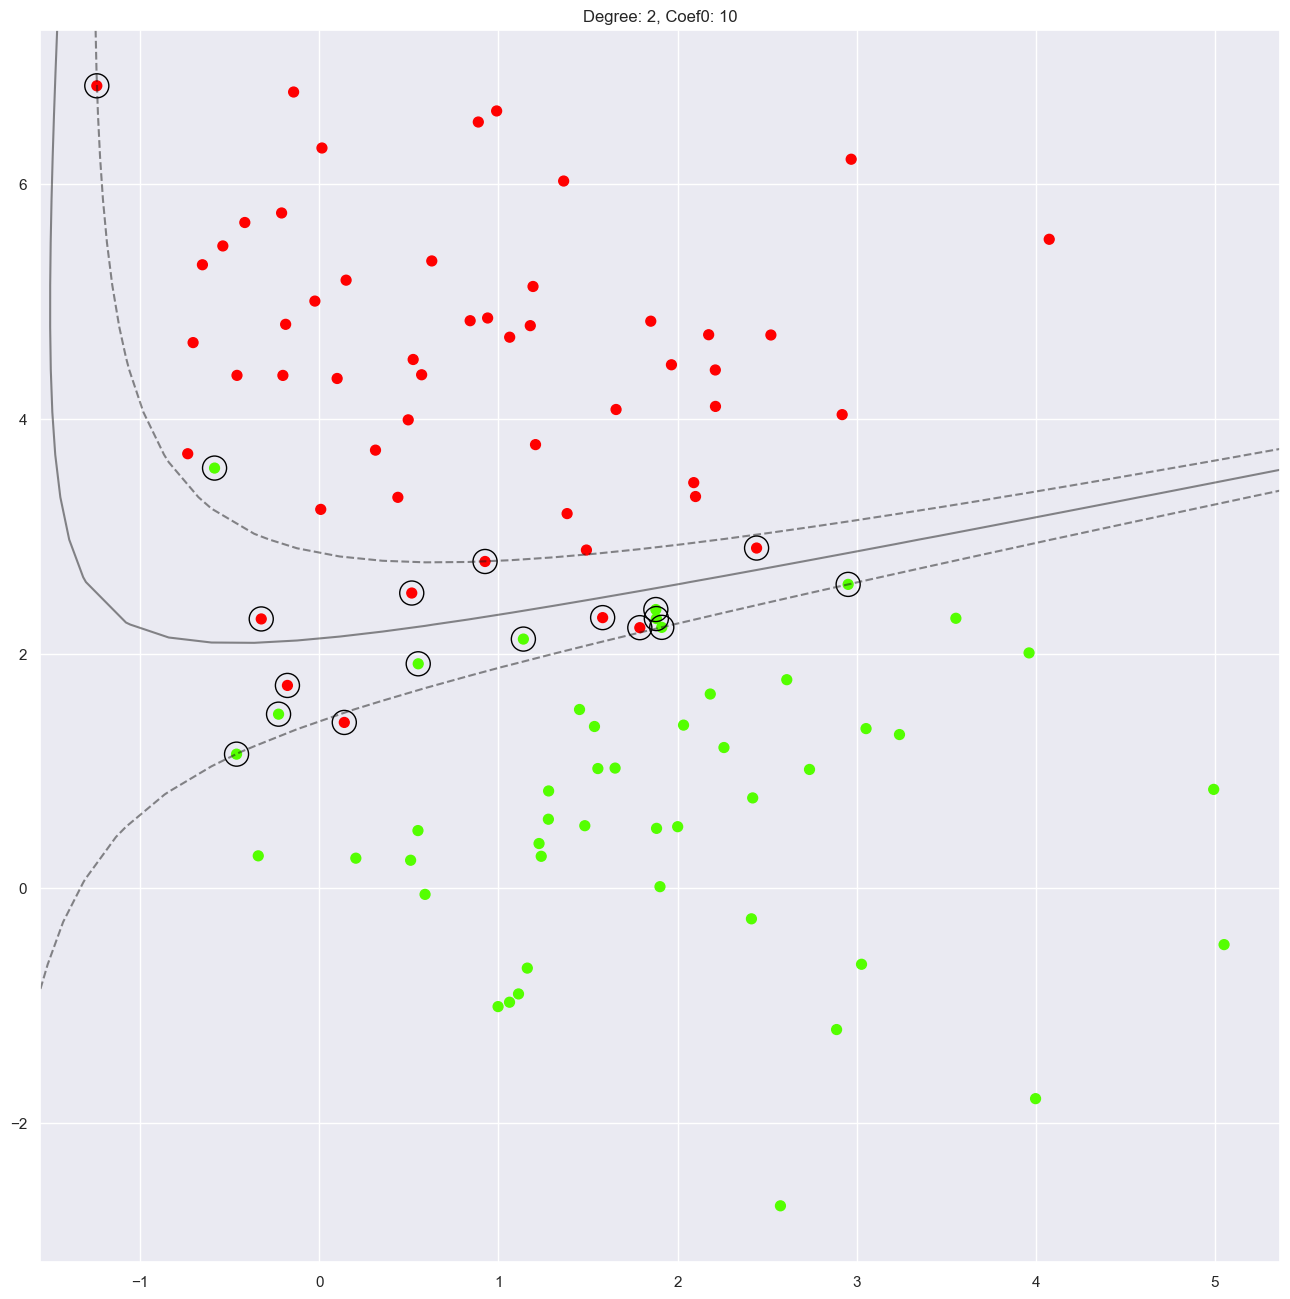

Degree: 2, Coef0: 10
Nombre de vecteurs de support : 18
Score sur échantillon test : 0.90


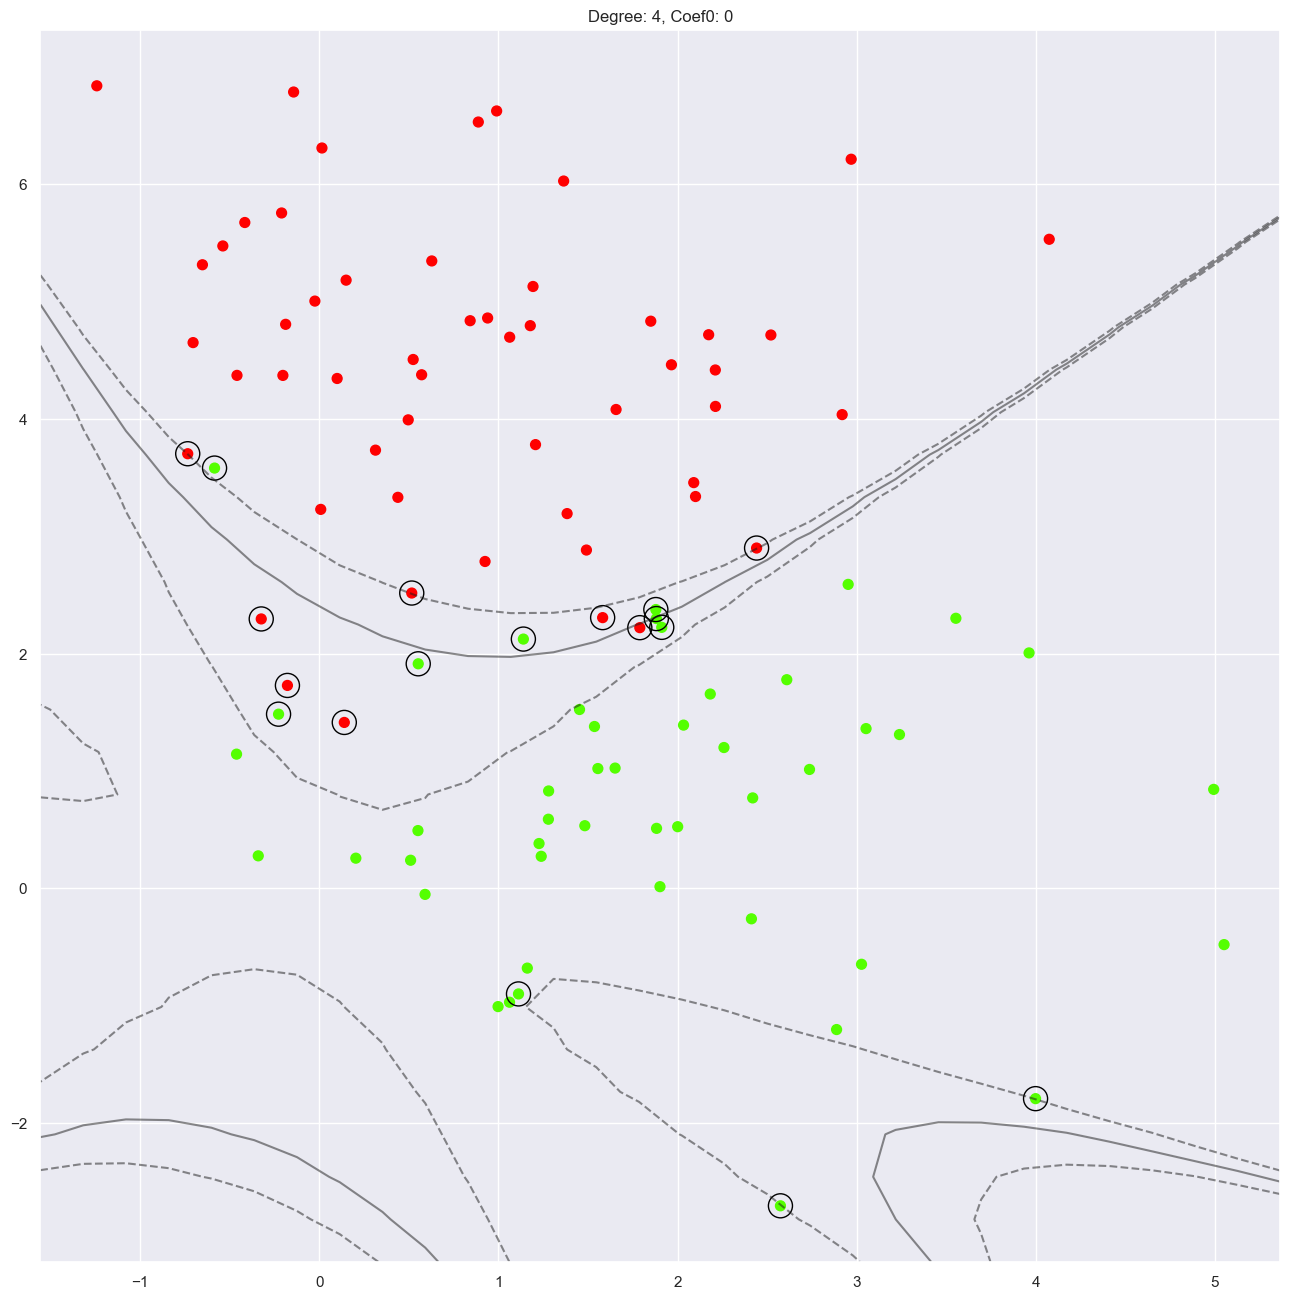

Degree: 4, Coef0: 0
Nombre de vecteurs de support : 18
Score sur échantillon test : 0.88


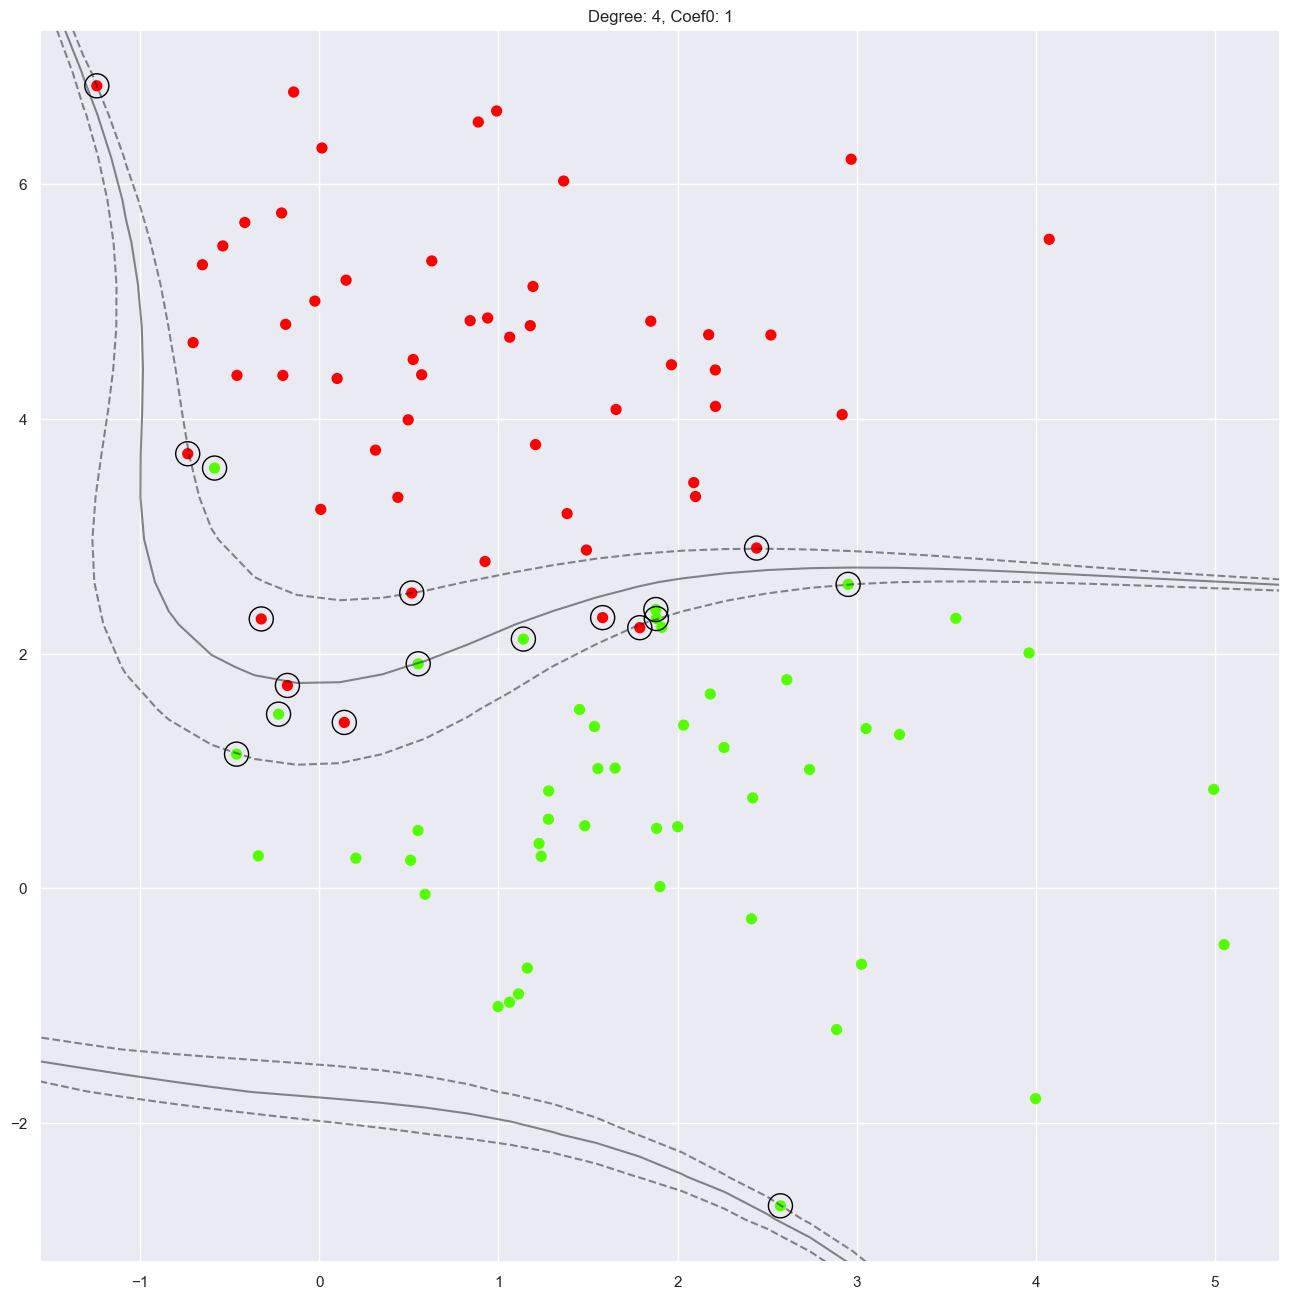

Degree: 4, Coef0: 1
Nombre de vecteurs de support : 18
Score sur échantillon test : 0.89


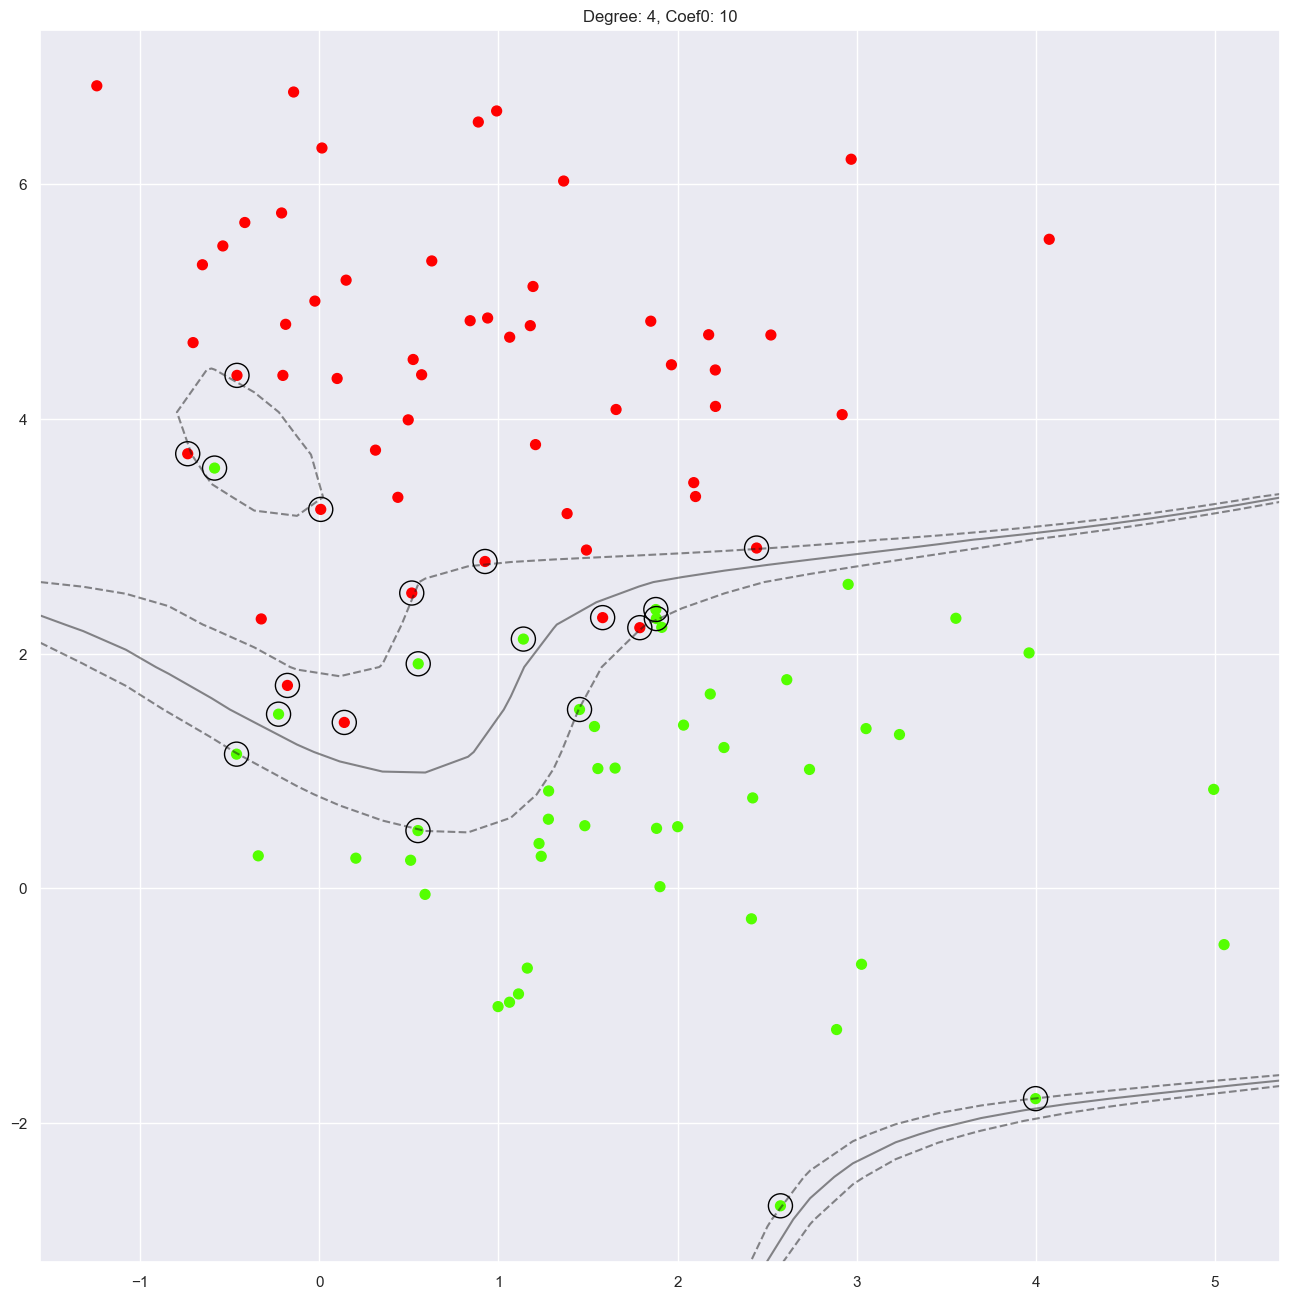

Degree: 4, Coef0: 10
Nombre de vecteurs de support : 21
Score sur échantillon test : 0.90


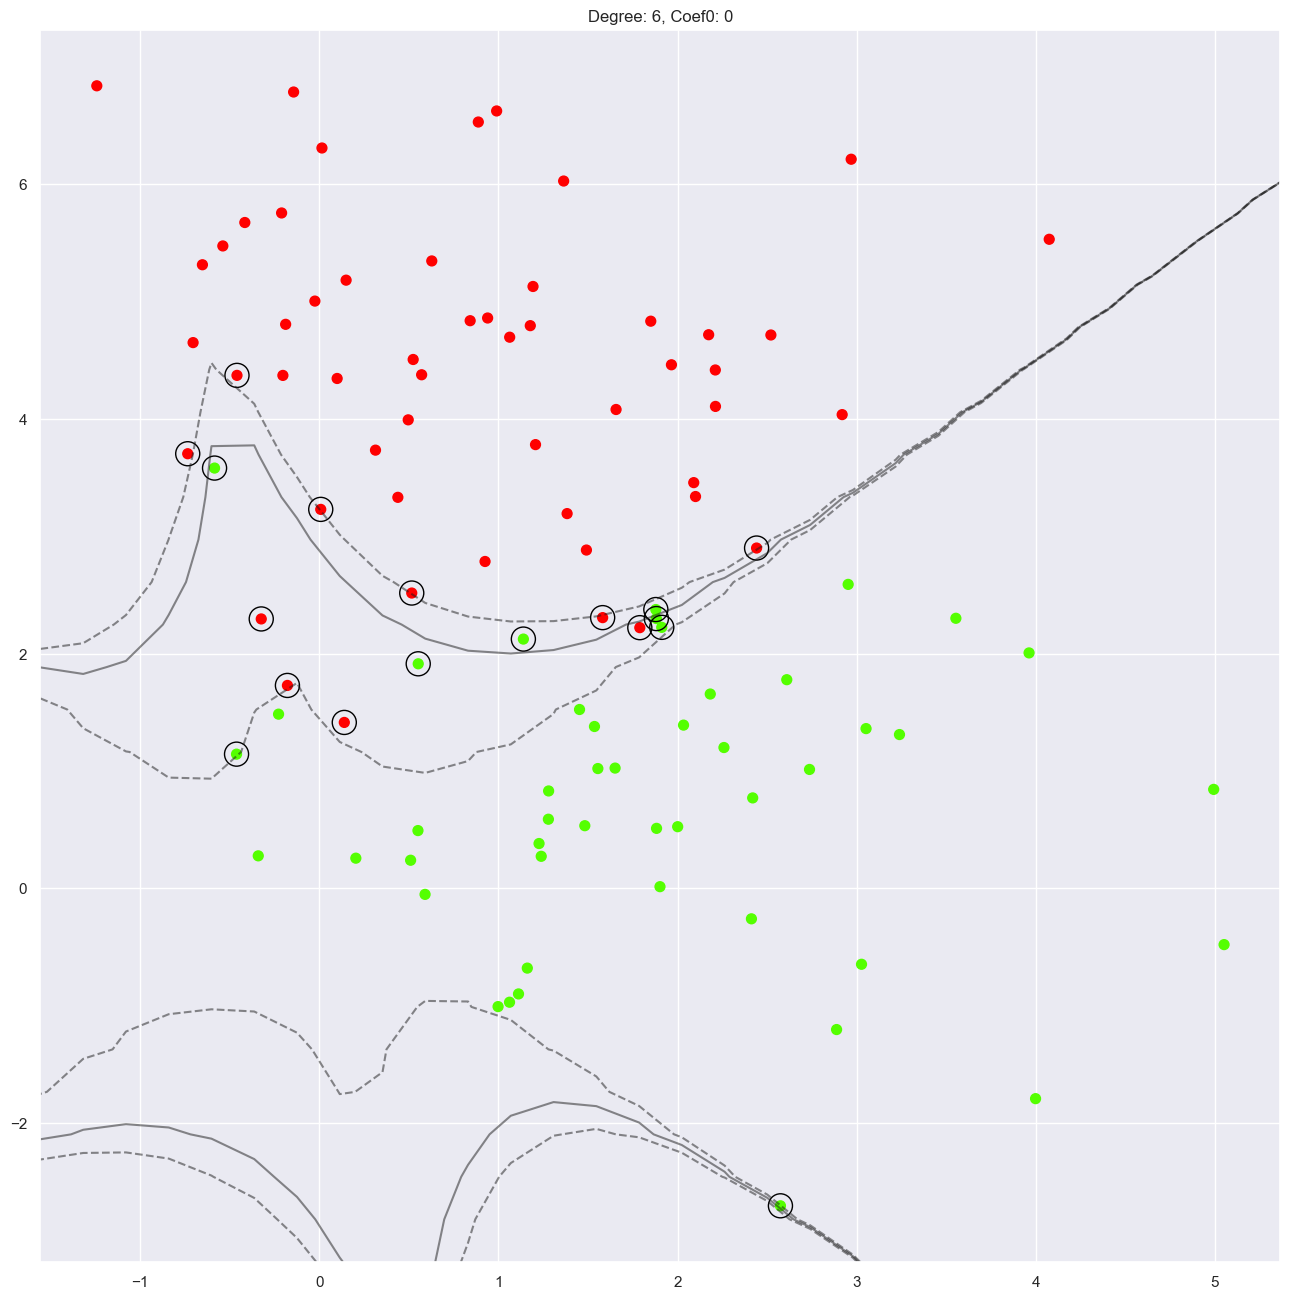

Degree: 6, Coef0: 0
Nombre de vecteurs de support : 18
Score sur échantillon test : 0.88


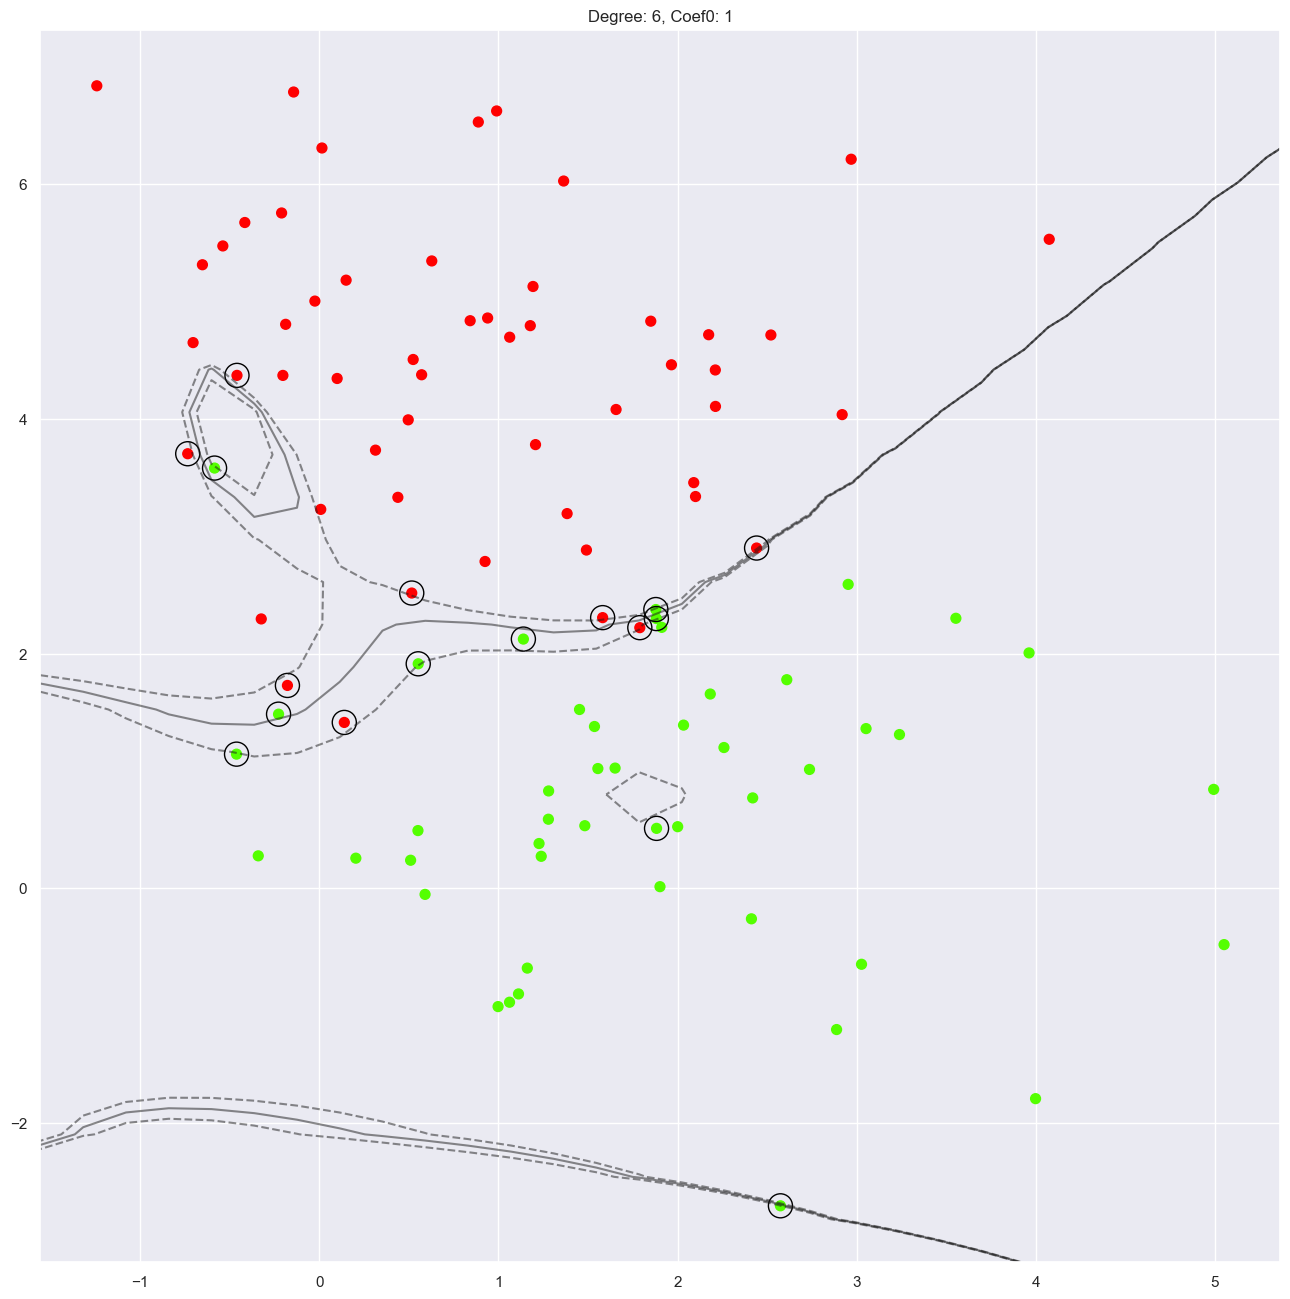

Degree: 6, Coef0: 1
Nombre de vecteurs de support : 17
Score sur échantillon test : 0.88


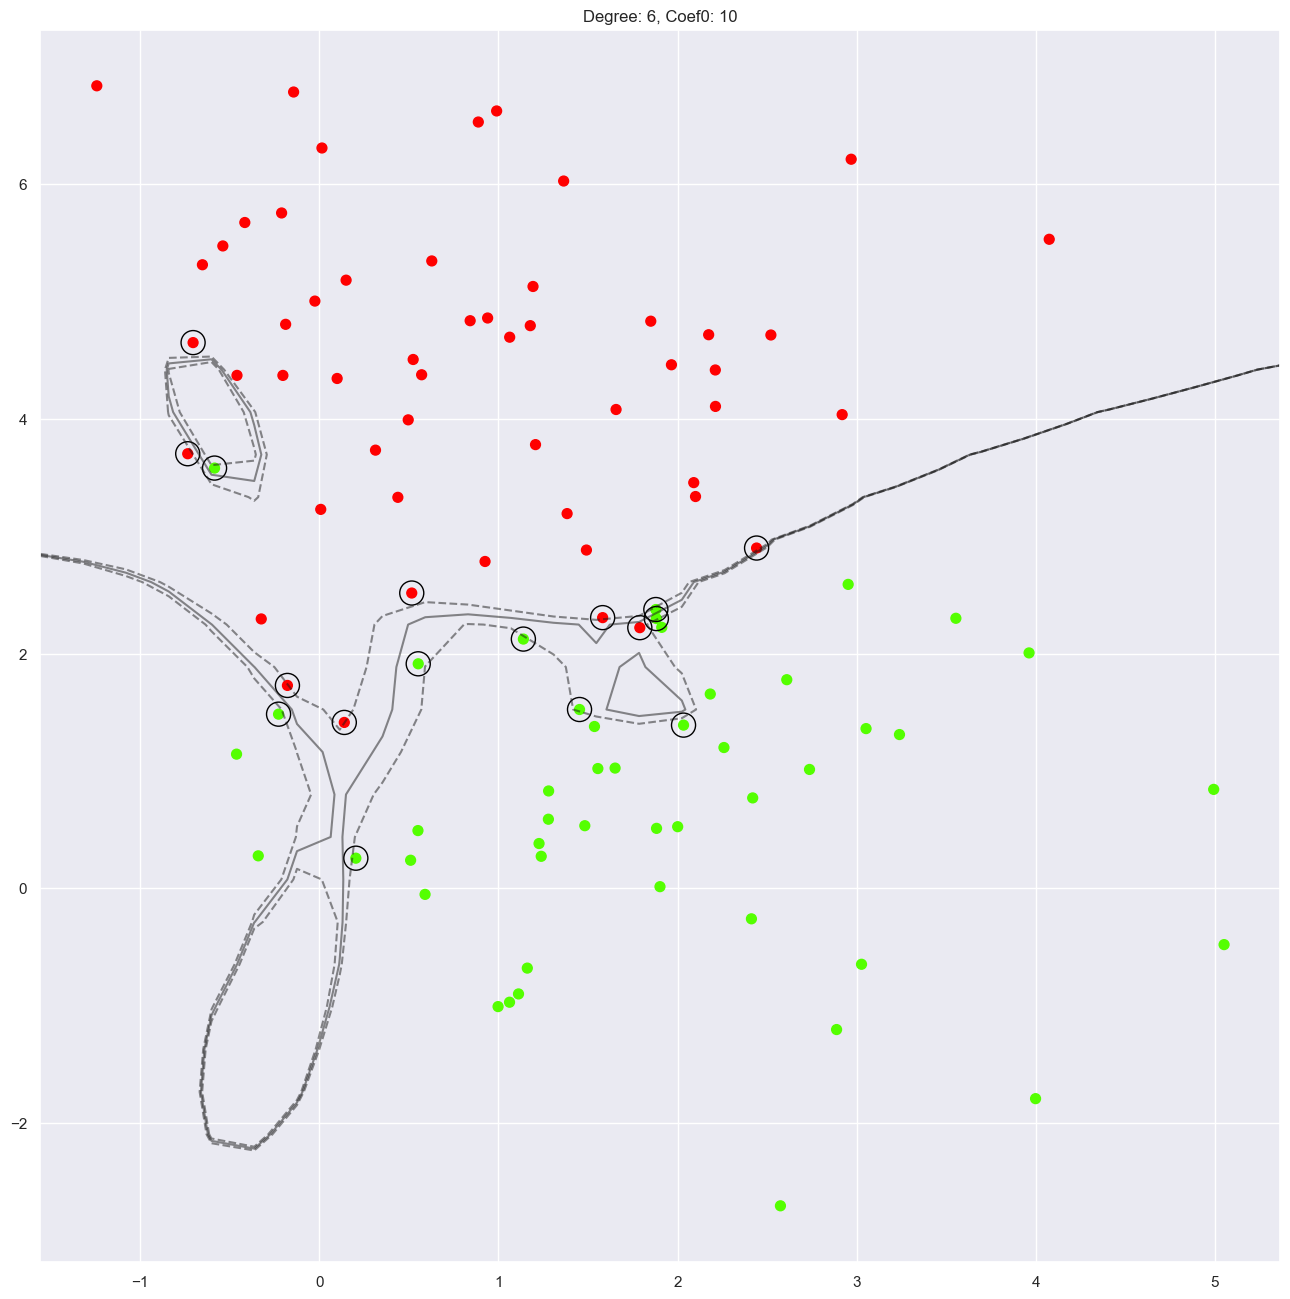

Degree: 6, Coef0: 10
Nombre de vecteurs de support : 17
Score sur échantillon test : 0.88


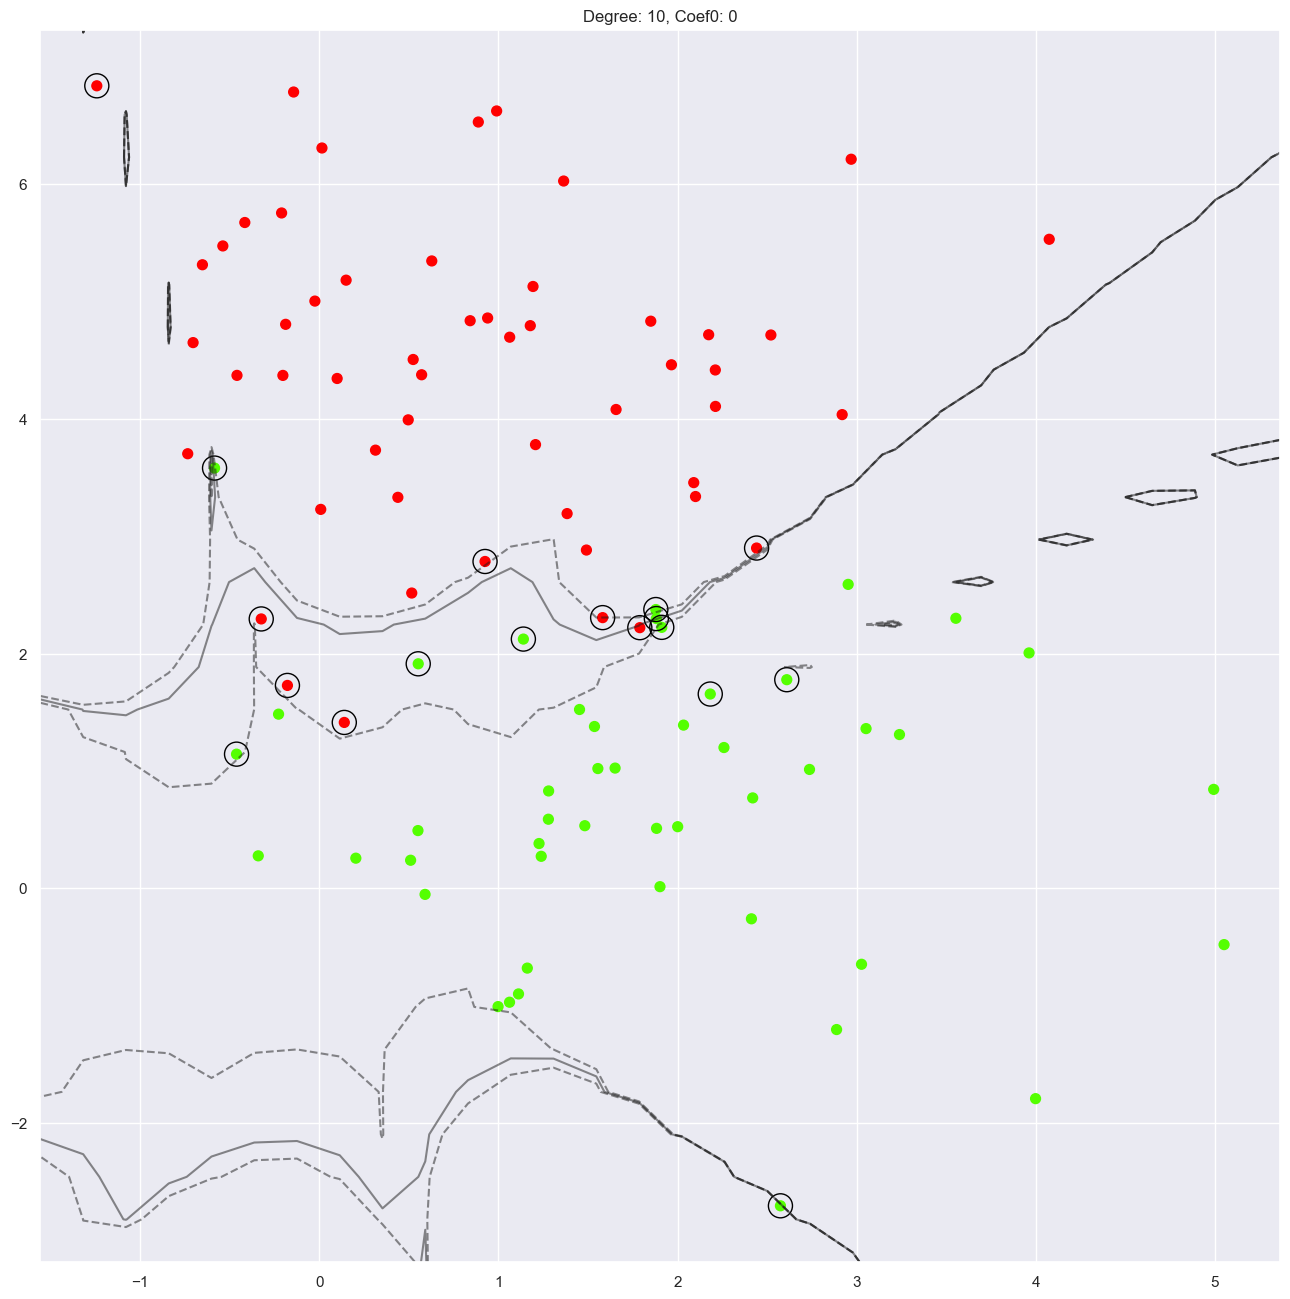

Degree: 10, Coef0: 0
Nombre de vecteurs de support : 18
Score sur échantillon test : 0.88


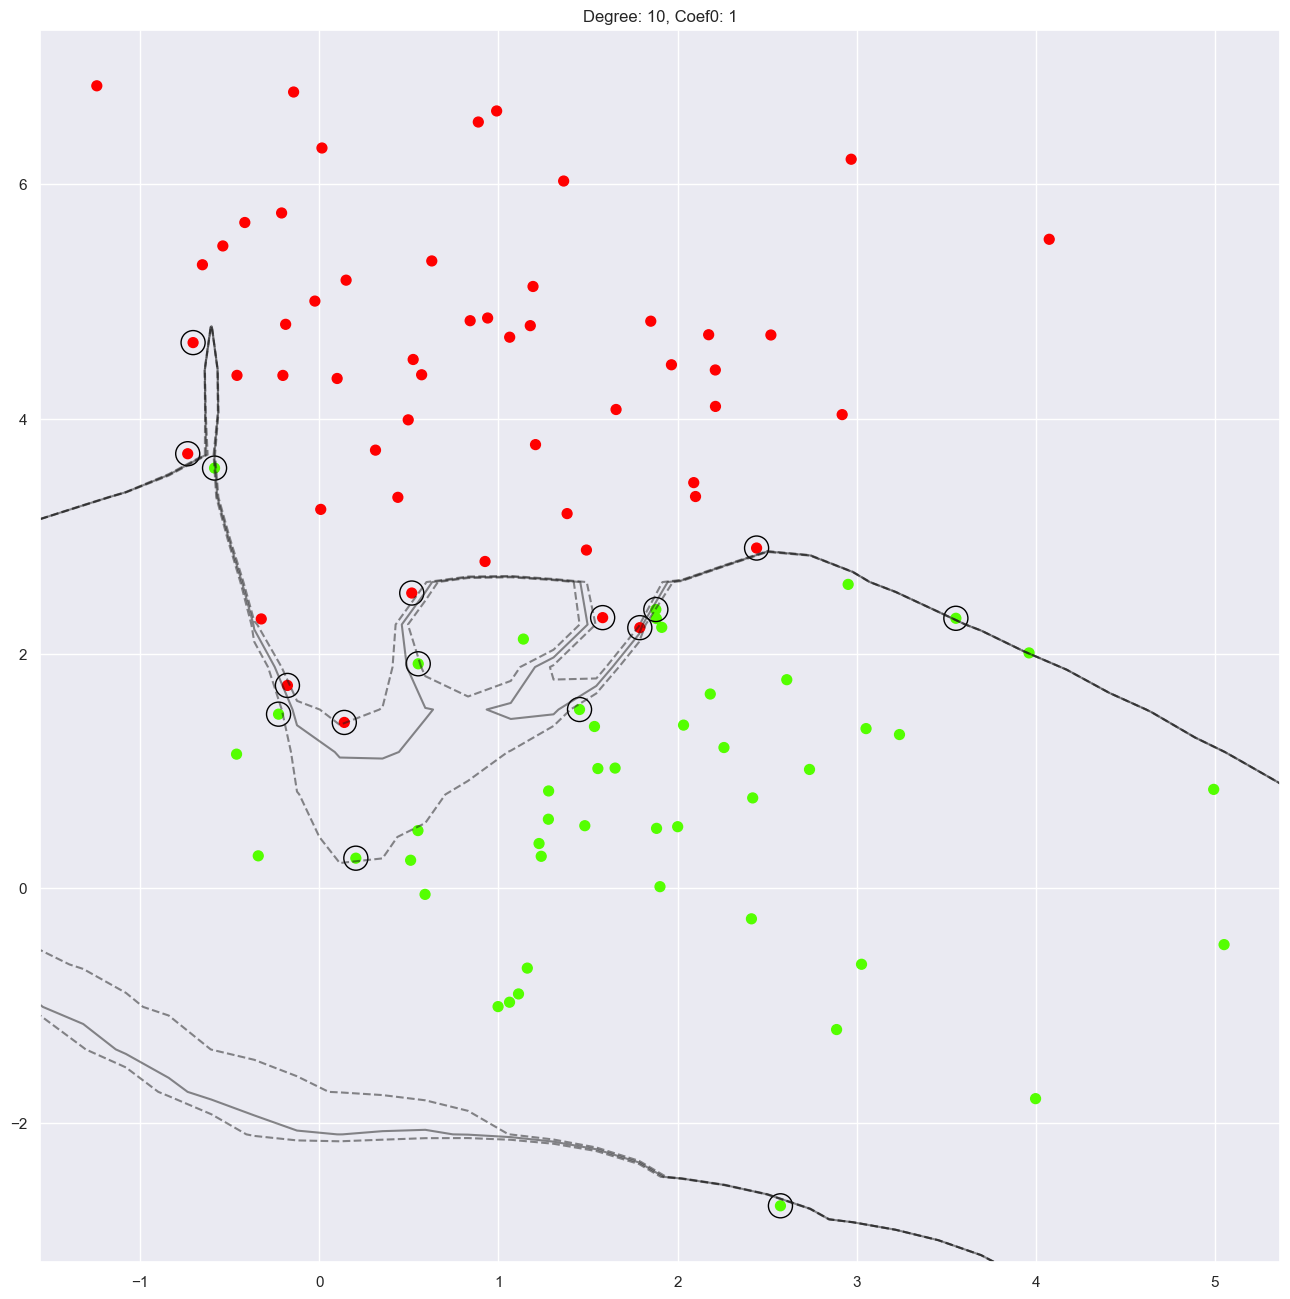

Degree: 10, Coef0: 1
Nombre de vecteurs de support : 16
Score sur échantillon test : 0.93


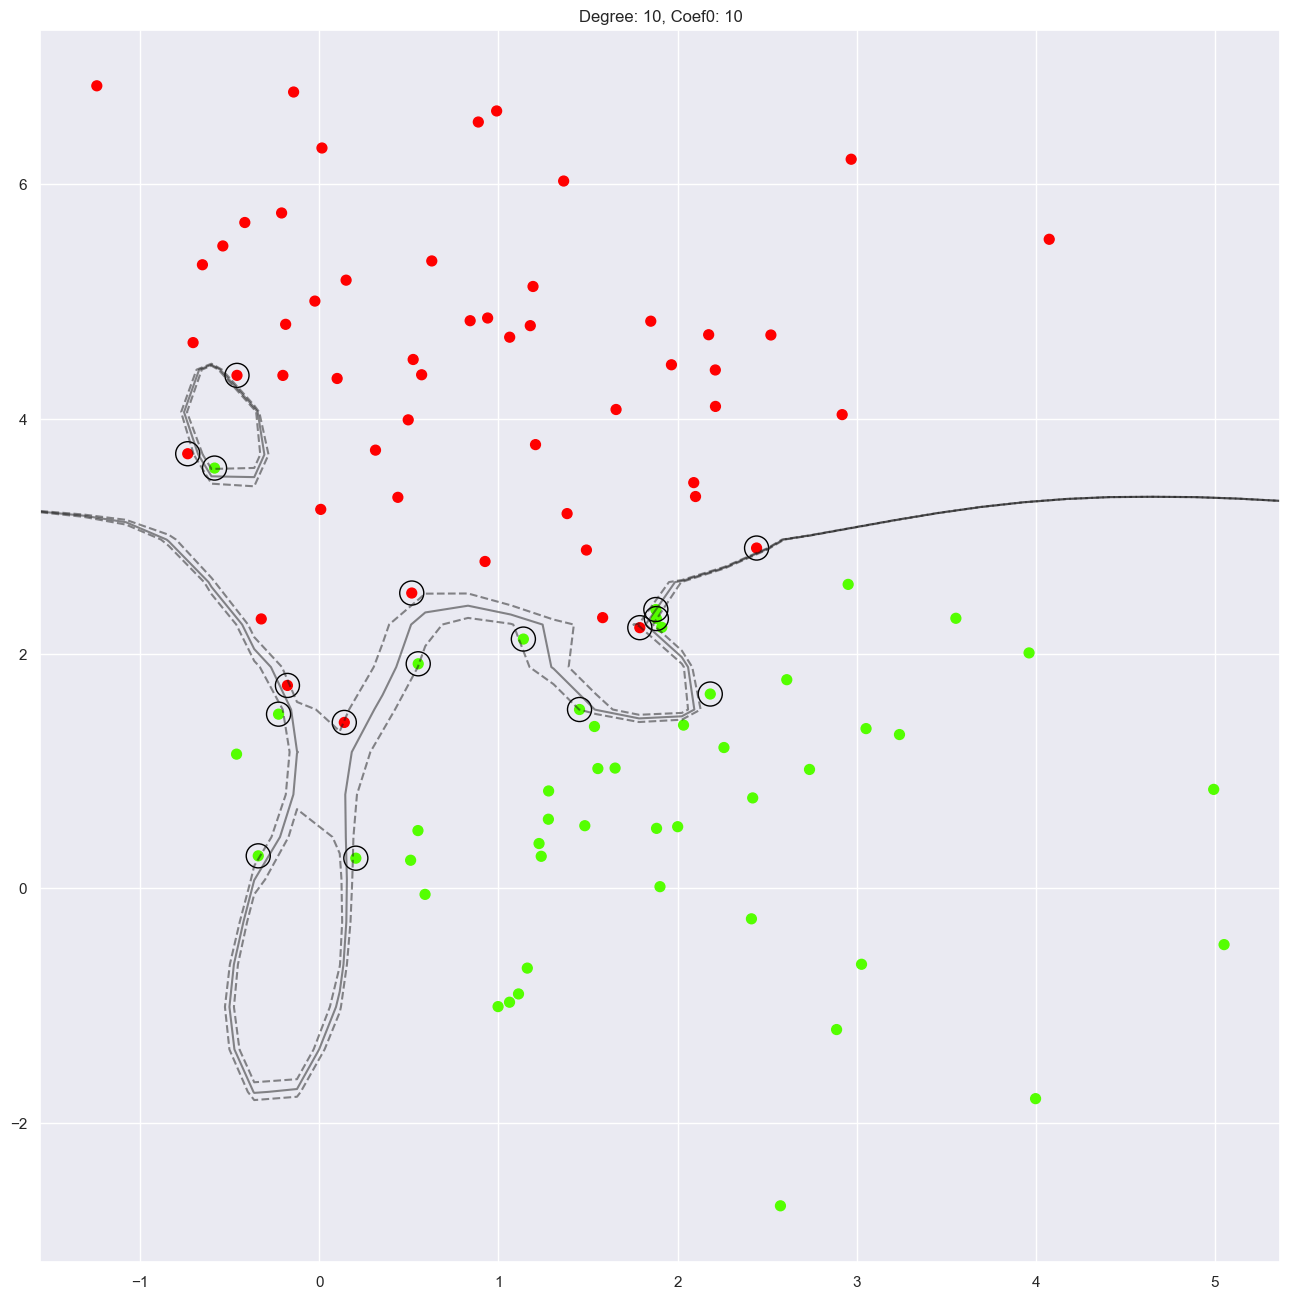

Degree: 10, Coef0: 10
Nombre de vecteurs de support : 17
Score sur échantillon test : 0.86


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Paramètres pour le noyau polynomial
degrees = [2,4,6,10]
coef0s = [0, 1, 10]

for degree in degrees:
    for coef0 in coef0s:
        clf = SVC(kernel='poly', degree=degree, coef0=coef0, gamma='auto')
        clf.fit(X_train, y_train)
        
        # Visualisation de la frontière de décision
        plt.figure(figsize=(16, 16))
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='prism')
        affiche_fonction_de_decision(clf)
        plt.title(f"Degree: {degree}, Coef0: {coef0}")
        plt.show()

        # Nombre de vecteurs de support
        print(f"Degree: {degree}, Coef0: {coef0}")
        print(f"Nombre de vecteurs de support : {len(clf.support_vectors_)}")

        # Score du modèle
        score = clf.score(X_test, y_test)
        print(f"Score sur échantillon test : {score:.2f}")

## Deuxième partie : un traitement (presque) complet
### Préparation des données
Nous allons utiliser un jeu de données réel - tiré de *Tsanas & Xifara : Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools, Energy and Buildings, Vol. 49, pp. 560-567, 2012* - qui vous est fourni avec l'énoncé.

Les 8 premières colonnes correspondent aux attributs descriptifs et les deux dernières, aux charges de chauffage et de climatisation (dans cet ordre).
Pour les utiliser en Python, vous pourrez vous servir du code suivant :

In [20]:
data = np.loadtxt("data.csv")
X = data[:,:-2]
Y = data[:,-2:]
Yheat = Y[:,0]
Ycool = Y[:,1]

### Apprentissage
Nous voulons comparer plusieurs méthodes d'apprentissage :

1. Les arbres de décision  (*DecisionTreeClassifier* de la classe *sklearn.tree*, hyperparamètre à régler : *max_depth*)
2. SVM à noyau gaussien  (*SVC* avec *kernel='rbf'* de la classe *sklearn.svm*, hyperparamètre à régler : *gamma*)
3. SVM à noyau polynomial (*SVC* avec *kernel='poly'* de la classe *sklearn.svm*, hyperparamètre à régler : *degree*)

Ecrivez le code permettant de :
1. Séparer les données en un échantillon d'apprentissage et un échantillon de test (80/20)
2. Sélectionner les meilleurs valeurs des hyperparamètres sur l'échantillon d'apprentissage par validation croisée en utilisant 10 folders

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Division des données en ensembles d'entraînement et de test (80/20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Préparation des grilles de recherche pour chaque modèle
param_grid_dt = {'max_depth': [None, 5, 10, 15, 20, 25, 30]}
param_grid_svr_rbf = {'gamma': [1e-3, 1e-2, 1e-1, 1, 10, 100]}
param_grid_svr_poly = {'degree': [4, 5, 6, 7, 8, 9, 10, 11]}

# Focalisation sur Yheat
Y_train_heat = Y_train[:, 0]

# GridSearchCV pour DecisionTreeRegressor
grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=10)
grid_search_dt.fit(X_train, Y_train_heat)

# GridSearchCV pour SVR avec noyau RBF
grid_search_svr_rbf = GridSearchCV(SVR(kernel='rbf'), param_grid_svr_rbf, cv=10)
grid_search_svr_rbf.fit(X_train, Y_train_heat)

# GridSearchCV pour SVR avec noyau polynomial
grid_search_svr_poly = GridSearchCV(SVR(kernel='poly'), param_grid_svr_poly, cv=10)
grid_search_svr_poly.fit(X_train, Y_train_heat)

# Affichage des meilleurs paramètres et scores
print("Meilleurs paramètres et scores pour chaque modèle :")
print("DecisionTreeRegressor:", grid_search_dt.best_params_, "Score:", grid_search_dt.best_score_)
print("SVR avec noyau RBF:", grid_search_svr_rbf.best_params_, "Score:", grid_search_svr_rbf.best_score_)
print("SVR avec noyau polynomial:", grid_search_svr_poly.best_params_, "Score:", grid_search_svr_poly.best_score_)


Meilleurs paramètres et scores pour chaque modèle :
DecisionTreeRegressor: {'max_depth': 10} Score: 0.9967567002189925
SVR avec noyau RBF: {'gamma': 0.01} Score: 0.8958116189836483
SVR avec noyau polynomial: {'degree': 9} Score: 0.8154767631981967
